# COM calculation
## Load all tiffs in scan folder, average, plot centre of mass of residuals in 2D

In [41]:
import tifffile as tif
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import center_of_mass as com
from scipy.optimize import curve_fit
import os
from scipy.signal import detrend
import scipy.io as sio

In [42]:
%matplotlib inline

#Needs to follow inline magick command
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 32
plt.rcParams['image.cmap'] = 'viridis'

## Change following variables as required

In [43]:
imgsperpt=1 #Acquisitions per scan point
ny, nx=51,41 #Scan dimensions
path='95/'  #Scan path

#ROI of data you want to analyze
roix1=128
roix2=roix1+160
roiy1=150
roiy2=roiy1+192

detx,dety=512,512

In [44]:
files=os.listdir(path)
nfiles=len(files)
npts=nfiles/imgsperpt


data=np.zeros((npts,roiy2-roiy1,roix2-roix1),float)
i,j=0,0
for fl in files:
    data[i,:,:]=tif.imread(path+fl)[roiy1:roiy2,roix1:roix2]
    j+=1
    if(j%imgsperpt==0): i+=1
print i,j, data.shape

2091 2091 (2091, 192, 160)


## Subtract average detector image from each frame

In [45]:
avg_intens=np.average(data, axis=0)
data2=data-avg_intens
#data2=data

## Plot average intensity and ith frame

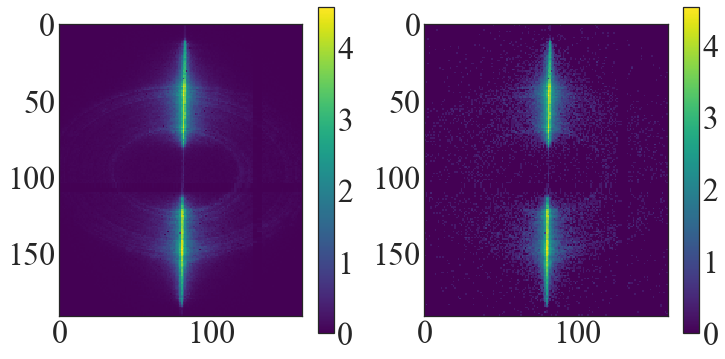

In [46]:
i=0
figs,ax=plt.subplots(1,2,figsize=(12,6))
im=ax[0].imshow(np.log10(avg_intens+1))
plt.colorbar(im,ax=ax[0])
im=ax[1].imshow(np.log10(data[0]+1))
plt.colorbar(im,ax=ax[1])

## Plot data after subtracting average from each frame

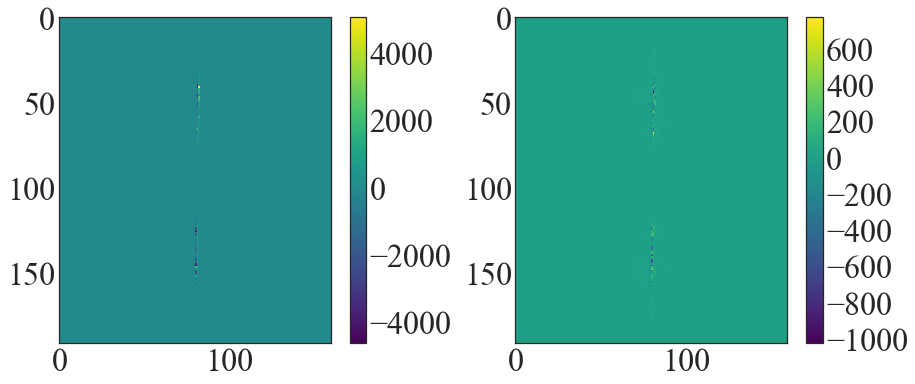

In [47]:
i,j=0,1000
figs,ax=plt.subplots(1,2,figsize=(15,6))
im=ax[0].imshow(data2[i])
plt.colorbar(im,ax=ax[0])
im=ax[1].imshow(data2[j])
plt.colorbar(im,ax=ax[1])

## Calculate centre of masses, subtract the COM of the first image
### All centroid shift is now relative

In [48]:
coms=np.zeros((npts,2),float)
for i in range(npts):
    coms[i,:]=np.asarray(com(data[i,:,:]))

print (coms[0], coms[1000])
coms-=coms[0,:]
print (coms[0], coms[1000])

(array([95.28238867, 80.73494484]), array([96.32982272, 80.66061206]))
(array([0., 0.]), array([ 1.04743406, -0.07433279]))


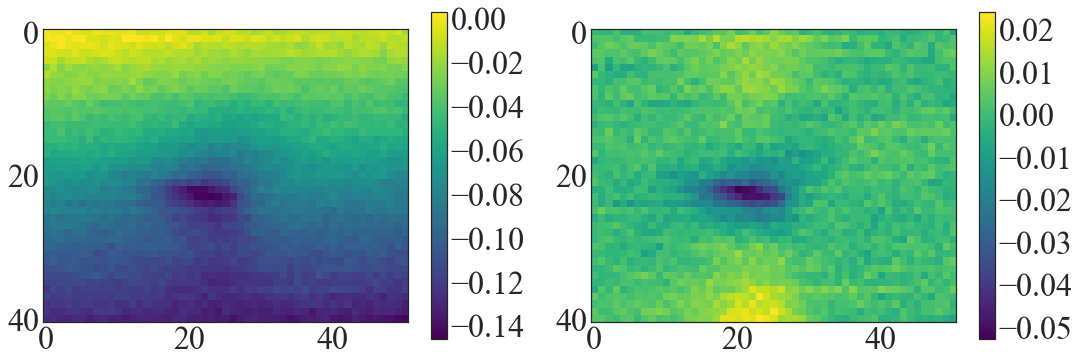

In [49]:
coms=coms.reshape(nx,ny,2)
figs,ax=plt.subplots(1,2,figsize=(18,6))
im=ax[0].imshow(coms[:,:,1])
plt.colorbar(im,ax=ax[0])

tmp2=detrend(coms[:,:,1], axis=0)
im=ax[1].imshow(tmp2)
plt.colorbar(im,ax=ax[1])

In [36]:
sio.savemat('raw_data.mat', {'data':data})